In [12]:
# Import pandas and plotting modules
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_theme()

# (Chapter 1) Correlation and Autocorrelation

# 1. Introduction to the Course
Welcome to the first video of the "Introduction to Times Series Analysis Using Python" course. My name is Rob Reider. I'm an Adjunct Professor in the Math-Finance Master's program at NYU's Courant Institute, where I teach a course on Time Series Analysis. I'm also a consultant to a company called Quantopian, which has built a Python-based platform for analyzing and backtesting quantitative trading strategies. Authors of algorithms can enter into paper trading contests and be considered for an allocation of money. Authors receiving allocations are paid 10 percent of the strategy’s net profits, based on their strategy’s individual performance. Also, Quantopian hosts a community where members can ask for help, share ideas, and discuss and share code.

2. Example of Time Series: Google Trends
Time series analysis deals with data that is ordered in time. Of course, there are many other types of data that are not covered in this course - for example, cross-sectional data that are taken at one point in time. Time series come up in many contexts. Here is a time series of the frequency of Google searches for the word "diet" over a five year period. You can see an interesting pattern: it hits a low around the holidays, and then spikes up at the beginning of the year when people make New Year's resolutions to lose weight.

3. Example of Time Series: Climate Data
Here is another example of a time series: the average annual temperature in New York City since 1870. Notice that this time series is trending up. Many of the most interesting applications of time series analysis are financial time series. In this course, you will look at a variety of financial time series: stocks, bonds, commodities, even crytpocurrencies like Bitcoin.

4. Example of Time Series: Quarterly Earnings Data
Here is the time series of quarterly earnings for the company H&R Block. H&R Block is in the business of preparing tax returns for customers and selling tax software. The vast majority of their earnings occurs in the quarter that taxes are due. Notice the strong seasonality pattern in the earnings.

5. Example of Multiple Series: Natural Gas and Heating Oil
You will also look at two related series in the last chapter of this course. Here are the prices of two energy commodities, heating oil and natural gas, which move together.

6. Goals of Course
In this course, you will learn about various time series models, fit the data to these models, and use these models to make forecasts of the future. You will also learn how to use various statistical packages in Python to perform these tasks. Numerous examples will be provided, and I hope that these examples not only demonstrate how to apply these tools, but also address some interesting puzzles, mainly in the field of finance.

7. Some Useful Pandas Tools
In the course of analyzing time series data, you will use several convenient pandas tools for manipulating times series data. These methods will be used repeatedly throughout the course, so we will highlight a few of them now: `to_datetime()` is used to convert an index, often read in as a string, into a datetime index. The `plot` method of pandas is a quick way to plot data, and if the index has been converted to a datetime object, you can slice the data by year, for example. You will sometimes need to `merge` or `join` two DataFrames.

8. Some Useful Pandas Tools
For example, one DataFrame may contain stock prices and another DataFrame may contain bond prices. Pandas makes it easy to resample data. For example, a DataFrame of daily data can be converted to weekly data with the `resample` method

9. More pandas Functions
Often, you will want to convert prices to returns, which you can do with the` pct_change` method. Or if you want differences, you can use the `diff` method. You can compute the correlation of two series using the `corr` method, and the autocorrelation using the `autocorr` method. You'll learn more about these methods later in this chapter.

10. Let's practice!
Now let's practice using a few of these time series tools.

A "Thin" Application of Time Series
Google Trends (https://trends.google.com/trends/?geo=US) allows users to see how often a term is searched for. We downloaded a file from Google Trends containing the frequency over time for the search word "diet", which is pre-loaded in a DataFrame called diet. A first step when analyzing a time series is to visualize the data with a plot. You should be able to clearly see a gradual decrease in searches for "diet" throughout the calendar year, hitting a low around the December holidays, followed by a spike in searches around the new year as people make New Year's resolutions to lose weight.

Like many time series datasets you will be working with, the index of dates are strings and should be converted to a datetime index before plotting.

This course touches on a lot of concepts you may have forgotten, so if you ever need a quick refresher, download the pandas basics Cheat Sheet and keep it handy!

Instructions 1/3
50 XP
1
2
3
Convert the date index to datetime using pandas's to_datetime().

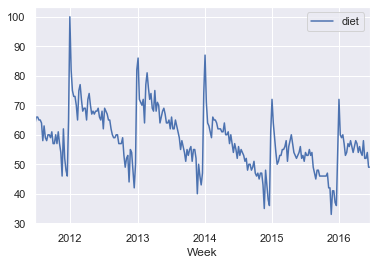

In [13]:
diet = pd.read_csv('diet.csv',header=1)
diet.set_index('Week', inplace=True)
diet.index = pd.to_datetime(diet.index)
diet.rename(columns={'diet: (United States)':'diet'},inplace=True)

# Plot the entire time series diet and show gridlines
diet.plot(grid=True)
plt.show()

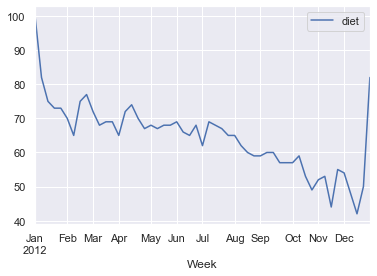

In [14]:
# From previous step
diet.index = pd.to_datetime(diet.index)

# Slice the dataset to keep only 2012
diet2012 = diet.loc['2012']

# Plot 2012 data
diet2012.plot(grid=True)
plt.show()

# Merging Time Series With Different Dates
Stock and bond markets in the U.S. are closed on different days. For example, although the bond market is closed on Columbus Day (around Oct 12) and Veterans Day (around Nov 11), the stock market is open on those days. One way to see the dates that the stock market is open and the bond market is closed is to convert both indexes of dates into sets and take the difference in sets.

The pandas .join() method is a convenient tool to merge the stock and bond DataFrames on dates when both markets are open.

Stock prices and 10-year US Government bond yields, which were downloaded from FRED, are pre-loaded in DataFrames stocks and bonds.

Instructions
70 XP
Convert the dates in the stocks.index and bonds.index into sets.
Take the difference of the stock set minus the bond set to get those dates where the stock market has data but the bond market does not.
Merge the two DataFrames into a new DataFrame, stocks_and_bonds using the .join() method, which has the syntax df1.join(df2).
To get the intersection of dates, use the argument how='inner'.


Show Answer (-70 XP)
Hint
You merge the two DataFrames using stocks_and_bonds = stocks.join(bonds, how='inner')

In [15]:
#Importing data for JupyterNotebook
stocks = pd.read_csv('SP500.csv')
bonds = pd.read_csv('T10Y2Y.csv')


In [16]:
# Not part of exercise, just shaping the data
stocks.DATE = pd.to_datetime(stocks.DATE)
stocks.set_index('DATE', inplace=True)
bonds.DATE = pd.to_datetime(bonds.DATE)
bonds.set_index('DATE', inplace=True)
bonds.rename(columns = {'T10Y2Y':'US10Y'},inplace=True)
stocks = stocks[stocks['SP500']!='.']
bonds = bonds[bonds['US10Y']!='.']

In [17]:
# Convert the stock index and bond index into sets
set_stock_dates = set(stocks.index)
set_bond_dates = set(bonds.index)

# Take the difference between the sets and print
print(set_stock_dates - set_bond_dates)

# Merge stocks and bonds DataFrames using join()
stocks_and_bonds = stocks.join(bonds,how='inner')


{Timestamp('2018-11-12 00:00:00'), Timestamp('2018-10-08 00:00:00'), Timestamp('2019-10-14 00:00:00'), Timestamp('2021-10-11 00:00:00'), Timestamp('2017-10-09 00:00:00'), Timestamp('2020-10-12 00:00:00'), Timestamp('2021-11-11 00:00:00'), Timestamp('2019-11-11 00:00:00'), Timestamp('2020-11-11 00:00:00')}


In [18]:
stocks_and_bonds.SP500 = pd.to_numeric(stocks_and_bonds.SP500)
stocks_and_bonds.US10Y = pd.to_numeric(stocks_and_bonds.US10Y)


# 1. Correlation of Two Time Series
Often, two time series vary together.

2. Correlation of Two Time Series
Often, two time series vary together. Here is a plot of the stock prices of JP Morgan and the S&P500. You can see from this plot that, in general, when the market drops, JP Morgan drops as well, and when the market rises, JP Morgan also rises.

3. Correlation of Two Time Series
A scatter plot of the returns of JP Morgan and the returns of the market help to visualize the relationship between the two time series.

4. More Scatter Plots
The correlation coefficient is a measure of how much two series vary together. A correlation of one means that the two series have a perfect linear relationship with no deviations. High correlations mean that the two series strongly vary together. A low correlation means they vary together, but there is a weak association. And a high negative correlation means they vary in opposite directions, but still with a linear relationship.

5. Common Mistake: Correlation of Two Trending Series
Consider two time series that are both trending. Even if the two series are totally unrelated, you could still get a very high correlation. That's why, when you look at the correlation of say, two stocks, you should look at the correlation of their *returns*, not their levels. In this example, the two series, stock prices and UFO sightings, both trend up over time. Of course, there is no relationship between those two series, but the correlation is 0-point-94. If you compute the correlation of percent changes, the correlation goes down to approximately zero.

6. Example: Correlation of Large Cap and Small Cap Stocks
Now you'll see how to compute the correlation of two financial time series, the S&P500 index of large cap stocks and the Russell 2000 index of small cap stocks, using the pandas correlation method. First compute the percent changes using the pct_change method. This gives the returns of these series instead of prices.

7. Example: Correlation of Large Cap and Small Cap Stocks
You can also visualize the correlation with a scatter plot.

8. Example: Correlation of Large Cap and Small Cap Stocks
Then, use the pandas correlation method for Series. The correlation between large cap and small cap stocks is very high: 0-point-868

9. Let's practice!
Time to put this into practice

Correlation of stocks and interest rates:  nan


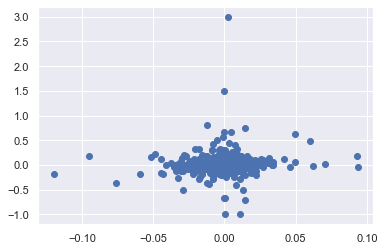

In [19]:
# Compute percent change using pct_change()
returns = stocks_and_bonds.pct_change()

# Compute correlation using corr()
correlation = returns['SP500'].corr(returns['US10Y'])
print("Correlation of stocks and interest rates: ", correlation)

# Make scatter plot
plt.scatter(returns['SP500'], returns['US10Y'])
plt.show()

# Flying Saucers Aren't Correlated to Flying Markets
Two trending series may show a strong correlation even if they are completely unrelated. This is referred to as "spurious correlation". That's why when you look at the correlation of say, two stocks, you should look at the correlation of their returns and not their levels.

To illustrate this point, calculate the correlation between the levels of the stock market and the annual sightings of UFOs. Both of those time series have trended up over the last several decades, and the correlation of their levels is very high. Then calculate the correlation of their percent changes. This will be close to zero, since there is no relationship between those two series.

The DataFrame levels contains the levels of DJI and UFO. UFO data was downloaded from www.nuforc.org.

Instructions
100 XP
Calculate the correlation of the columns DJI and UFO.
Create a new DataFrame of changes using the .pct_change() method.
Re-calculate the correlation of the columns DJI and UFO on the changes.

In [20]:
DJI = pd.read_csv('DJI.csv'); UFO = pd.read_csv('UFO.csv')
DJI.set_index('Date', inplace=True);UFO.set_index('Date',inplace=True)
levels = DJI.join(UFO,lsuffix='DJI', rsuffix='UFO')
levels.rename(columns={'ValueDJI':'DJI','ValueUFO':'UFO'},inplace=True)


Correlation of levels:  0.9399762210726432
Correlation of changes:  0.06026935462405376


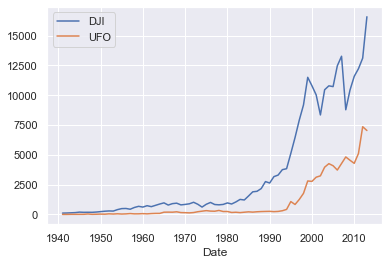

In [21]:
# Compute correlation of levels
correlation1 = levels['DJI'].corr(levels['UFO'])
print("Correlation of levels: ", correlation1)

# Compute correlation of percent changes
changes = levels.pct_change()
correlation2 = changes['DJI'].corr(changes['UFO'])
print("Correlation of changes: ", correlation2)
levels.plot(grid=True)
plt.show()

# 1. Simple Linear Regressions
In this video you'll learn about simple linear regressions of time series.

2. What is a Regression?
A simple linear regression finds the slope, beta, and intercept, alpha, of a line that's the best fit between a dependent variable, y, and an independent variable, x. The x's and y's can be two time series.

3. What is a Regression?
A linear regression is also known as Ordinary Least Squares, or OLS, because it minimizes the sum of the squared distances between the data points and the regression line.

4. Python Packages to Perform Regressions
Regression techniques are very common, and therefore there are many packages in Python that can be used. In statsmodels, there is OLS. In numpy, there is polyfit, and if you set degree equals 1, it fits the data to a line, which is a linear regression. Pandas has an ols method, and scipy has a linear regression function. Beware that the order of x and y is not consistent across packages. All these packages are very similar, and in this course, you will use the statsmodels OLS.

5. Example: Regression of Small Cap Returns on Large Cap
Now you'll regress the returns of the small cap stocks on the returns of large cap stocks. Compute returns from prices using the "pct_change" method in pandas. You need to add a column of ones as a dependent, right hand side variable. The reason you have to do this is because the regression function assumes that if there is no constant column, then you want to run the regression without an intercept. By adding a column of ones, statsmodels will compute the regression coefficient of that column as well, which can be interpreted as the intercept of the line. The statsmodels method "add constant" is a simple way to add a constant.

6. Regression Example (continued)
Notice that the first row of the return series is NaN. Each return is computed from two prices, so there is one less return than price. To delete the first row of NaN's, use the pandas method "dropna". You're finally ready to run the regression. The first argument of the statsmodel regression is the series that represents the dependent variable, y, and the next argument contains the independent variable or variables. In this case, the dependent variable is the R2000 returns and the independent variables are the constant and SPX returns. The method "fit" runs the regression and results are saved in a class instance called results.

7. Regression Example (continued)
The summary method of results shows the entire regression output. We will only focus on a few items of the regression results. In the red box, the coefficent 1-point-1412 is the slope of the regression, which is also referred to as beta. The coefficient above that is the intercept, which is very close to zero. You can also pull out individual items from results, like the intercept, in results-dot-params zero, and the slope, in results-dot-params one.

8. Regression Example (continued)
Another statistic to take note of is the R-Squared of 0-point-753. That will be discussed next.

9. Relationship Between R-Squared and Correlation
From the scatter diagrams, you saw that the correlation measures how closely the data are clustered along a line. The R-squared also measures how well the linear regression line fits the data. So as you would expect, there is a relationship between correlation and R-squared. The magnitude of the correlation is the square root of the R-squared. And the sign of the correlation is the sign of the slope of the regression line. If the regression line is positively sloped, the correlation is positive and if the the regression line is negatively sloped, the correlation is negative. In the example you just analyzed, of large cap and small cap stocks, the R-Squared was 0-point-753, the slope of the regression was positive, so the correlation is then positive the square root of 0-point-753, or 0-point-868, which can be verified by computing the correlation directly.

10. Let's practice!
Now it's your turn.

# Looking at a Regression's R-Squared
R-squared measures how closely the data fit the regression line, so the R-squared in a simple regression is related to the correlation between the two variables. In particular, the magnitude of the correlation is the square root of the R-squared and the sign of the correlation is the sign of the regression coefficient.

In this exercise, you will start using the statistical package statsmodels, which performs much of the statistical modeling and testing that is found in R and software packages like SAS and MATLAB.

You will take two series, x and y, compute their correlation, and then regress y on x using the function OLS(y,x) in the statsmodels.api library (note that the dependent, or right-hand side variable y is the first argument). Most linear regressions contain a constant term which is the intercept (the  in the regression 
). To include a constant using the function OLS(), you need to add a column of 1's to the right hand side of the regression.

The module statsmodels.api has been imported for you as sm.

Instructions
100 XP
Compute the correlation between x and y using the .corr() method.
Run a regression:
First convert the Series x to a DataFrame dfx.
Add a constant using sm.add_constant(), assigning it to dfx1
Regress y on dfx1 using sm.OLS().fit().
Print out the results of the regression and compare the R-squared with the correlation.

In [22]:
# Import the statsmodels module
import statsmodels.api as sm

# Compute correlation of x and y
correlation = x.corr(y)
print("The correlation between x and y is %4.2f" %(correlation))

# Convert the Series x to a DataFrame and name the column x
dfx = pd.DataFrame(x, columns=['x'])

# Add a constant to the DataFrame dfx
dfx1 = sm.add_constant(dfx)

# Regress y on dfx1
result = sm.OLS(y,dfx1).fit()

# Print out the results and look at the relationship between R-squared and the correlation above
print(result.summary())

NameError: name 'x' is not defined

# 1. Autocorrelation
So far, you have looked at the correlation of two time series.

2. What is Autocorrelation?
So far, you have looked at the correlation of two time series. Autocorrelation is the correlation of a single time series with a lagged copy of itself. It's also called "serial correlation". Often, when we refer to a series's autocorrelation, we mean the "lag-one" autocorrelation. So when using daily data, for example, the autocorrelation would be the correlation of the series with the same series lagged by one day.

3. Interpretation of Autocorrelation
What does it mean when a series has a positive or negative autocorrelation? With financial time series, when returns have a negative autocorrelation, we say it is "mean reverting".

4. Interpretation of Autocorrelation
Alternatively, if a series has positive autocorrelation, we say it is "trend-following".

5. Traders Use Autocorrelation to Make Money
Lest you think these concepts of autocorrelation are purely theoretical, they are actually used on Wall Street to make money. Many hedge fund strategies are only slightly more complex versions of mean reversion and momentum strategies. Since stocks have historically had negative autocorrelation over horizons of about a week, one popular strategy is to buy stocks that have dropped over the last week and sell stocks that have gone up. For other assets like commodities and currencies, they have historically had positive autocorrelation over horizons of several months, so the typical hedge fund strategy there is to buy commodities that have gone up in the last several months and sell those commodities that have gone down.

6. Example of Positive Autocorrelation: Exchange Rates
Here is an example of how you would compute the monthly autocorrelation for the Japanese Yen-US Dollar exchange rate. The data was downloaded from the FRED website, which stands for Federal Reserve Economic Data. The date column was read in as a string, so before you can compute autocorrelations, you will have to convert the dates in the DataFrame index to a datetime object using the pandas method "to_datetime". Now that it's a datetime object, downsample the data using the resample method. The "rule" argument indicates the desired frequency. 'M' stands for monthly. The how argument indicates how to do the resampling. For example, you can use the first date of the period, the last date, or even an average. Finally, compute the autocorrelation using the pandas method "autocorr". Notice in this example that the autocorrelation is positive, 0-point-0567, so this series exhibits some momentum.

7. Let's practice!
Now it's your turn. You'll look at a few financial time series that have negative autocorrelation.

In [ ]:
import os
os.listdir()

In [ ]:
MSFT = pd.read_csv('MSFT.csv')
MSFT.set_index('Date', inplace=True)
MSFT.index = pd.to_datetime(MSFT.index)

In [ ]:
# Convert the daily data to weekly data
MSFT = MSFT.resample(rule='W').last()

# Compute the percentage change of prices
returns = MSFT.pct_change()

# Compute and print the autocorrelation of returns
autocorrelation = returns['Adj Close'].autocorr()
print("The autocorrelation of weekly returns is %4.2f" %(autocorrelation))
MSFT.plot()
plt.show()

# Are Interest Rates Autocorrelated?
When you look at daily changes in interest rates, the autocorrelation is close to zero. However, if you resample the data and look at annual changes, the autocorrelation is negative. This implies that while short term changes in interest rates may be uncorrelated, long term changes in interest rates are negatively autocorrelated. A daily move up or down in interest rates is unlikely to tell you anything about interest rates tomorrow, but a move in interest rates over a year can tell you something about where interest rates are going over the next year. And this makes some economic sense: over long horizons, when interest rates go up, the economy tends to slow down, which consequently causes interest rates to fall, and vice versa.

The DataFrame daily_rates contains daily data of 10-year interest rates from 1962 to 2017.

Instructions
100 XP
Create a new DataFrame, daily_diff, of changes in daily rates using the .diff() method.
Compute the autocorrelation of the column 'US10Y' in daily_diff using the .autocorr() method.
Use the .resample() method with arguments rule='A' to convert to annual frequency and how='last'.
The argument how in .resample() has been deprecated.
The new syntax .resample().last() also works.
Create a new DataFrame, yearly_diff of changes in annual rates and compute the autocorrelation, as above.

In [ ]:
daily_rates = pd.read_csv('10yearinterest.csv')
daily_rates.set_index('DATE', inplace=True)
daily_rates.index = pd.to_datetime(daily_rates.index)
daily_rates.rename(columns={'DGS10':'US10Y'},inplace=True)
daily_rates = daily_rates[daily_rates['US10Y']!='.']
daily_rates.US10Y = pd.to_numeric(daily_rates.US10Y) 
daily_rates.plot()
plt.show()

In [ ]:
# Compute the daily change in interest rates 
daily_diff = daily_rates.diff()

# Compute and print the autocorrelation of daily changes
autocorrelation_daily = daily_diff['US10Y'].autocorr()
print("The autocorrelation of daily interest rate changes is %4.2f" %(autocorrelation_daily))

# Convert the daily data to annual data
yearly_rates = daily_rates.resample(rule='A').last()

# Repeat above for annual data
yearly_diff = yearly_rates.diff()
autocorrelation_yearly = yearly_diff['US10Y'].autocorr()
print("The autocorrelation of annual interest rate changes is %4.2f" %(autocorrelation_yearly))

# (Chapter 2) Some Simple Time Series


# 1. Autocorrelation Function
The sample autocorrelation function, or ACF,

2. Autocorrelation Function
shows not only the lag-one autocorrelation from the last chapter, but the entire autocorrelation function for different lags. Any significant non-zero autocorrelations implies that the series can be forecast from the past.

3. ACF Example 1: Simple Autocorrelation Function
This autocorrelation function implies that you can forecast the next value of the series from the last two values, since the lag-one and lag-two autocorrelations differ from zero.

4. ACF Example 2: Seasonal Earnings
Consider the time series of quarterly earnings of the company H&R Block. As we mentioned last chapter, a vast majority of their earnings occurs in the quarter that taxes are due. In this case, you can clearly see a seasonal pattern in the quarterly data on the left, and the autocorrelation function on the right shows strong autocorrelation at lags 4, 8, 12, 16, and 20

5. ACF Example 3: Useful for Model Selection
The ACF can also be useful for selecting a parsimonious model for fitting the data. In this example, the pattern of the autocorrelation suggests a model for the series that will be discussed in the next chapter.

6. Plot ACF in Python
plot_acf is the statsmodels function for plotting the autocorrelation function. The input x is a series or array. The argument lags indicates how many lags of the autocorrelation function will be plotted. The alpha argument sets the width of the confidence interval, which is discussed on the next slide.

7. Confidence Interval of ACF
Here is an ACF plot that contains confidence intervals for each lag, which is the blue region in the figure.

8. Confidence Interval of ACF
In plot_acf, the argument alpha determines the width of the confidence intervals. For example, if alpha equals 0-point-05, that means that if the true autocorrelation at that lag is zero, there is only a 5% chance the sample autocorrelation will fall outside that window. You will get a wider confidence interval if you set alpha lower, or if you have fewer observations. An approximation to the width of the 95% confidence intervals, if you make some simplifying assumptions, is plus or minus 2 over the square root of the number of observations in your series. Incidentally, if you don't want to see confidence intervals in your plot, set alpha equal to one.

9. ACF Values Instead of Plot
Besides plotting the ACF, you can also extract its numerical values using a similar Python function, acf, instead of plot_acf.

10. Let's practice!
Now it's your turn.

In [ ]:
HRB = pd.read_csv('HRB.csv')
HRB.Quarter = pd.to_datetime(HRB.Quarter)
HRB.set_index('Quarter', inplace=True)
HRB.plot()
plt.show()

# Taxing Exercise: Compute the ACF
In the last chapter, you computed autocorrelations with one lag. Often we are interested in seeing the autocorrelation over many lags. The quarterly earnings for H&R Block (ticker symbol HRB) is plotted on the right, and you can see the extreme cyclicality of its earnings. A vast majority of its earnings occurs in the quarter that taxes are due.

You will compute the array of autocorrelations for the H&R Block quarterly earnings that is pre-loaded in the DataFrame HRB. Then, plot the autocorrelation function using the plot_acf module. This plot shows what the autocorrelation function looks like for cyclical earnings data. The ACF at lag=0 is always one, of course. In the next exercise, you will learn about the confidence interval for the ACF, but for now, suppress the confidence interval by setting alpha=1.

Instructions
100 XP
Import the acf module and plot_acf module from statsmodels.
Compute the array of autocorrelations of the quarterly earnings data in DataFrame HRB.
Plot the autocorrelation function of the quarterly earnings data in HRB, and pass the argument alpha=1 to suppress the confidence interval.

In [ ]:
# Import the acf module and the plot_acf module from statsmodels
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf

# Compute the acf array of HRB
acf_array = acf(HRB)
print(acf_array)

# Plot the acf function
plot_acf(HRB,alpha=1)
plt.show()

In [ ]:
returns = MSFT['Adj Close'].pct_change()
returns = pd.DataFrame(returns)
returns.columns
returns.dropna(inplace=True)

# Are We Confident This Stock is Mean Reverting?
In the last chapter, you saw that the autocorrelation of MSFT's weekly stock returns was -0.16. That autocorrelation seems large, but is it statistically significant? In other words, can you say that there is less than a 5% chance that we would observe such a large negative autocorrelation if the true autocorrelation were really zero? And are there any autocorrelations at other lags that are significantly different from zero?

Even if the true autocorrelations were zero at all lags, in a finite sample of returns you won't see the estimate of the autocorrelations exactly zero. In fact, the standard deviation of the sample autocorrelation is  where  is the number of observations, so if , for example, the standard deviation of the ACF is 0.1, and since 95% of a normal curve is between +1.96 and -1.96 standard deviations from the mean, the 95% confidence interval is . This approximation only holds when the true autocorrelations are all zero.

You will compute the actual and approximate confidence interval for the ACF, and compare it to the lag-one autocorrelation of -0.16 from the last chapter. The weekly returns of Microsoft is pre-loaded in a DataFrame called returns.

Instructions
100 XP
Recompute the autocorrelation of weekly returns in the Series 'Adj Close' in the returns DataFrame.
Find the number of observations in the returns DataFrame using the len() function.
Approximate the 95% confidence interval of the estimated autocorrelation. The math function sqrt() has been imported and can be used.
Plot the autocorrelation function of returns using plot_acf that was imported from statsmodels. Set alpha=0.05 for the confidence intervals (that's the default) and lags=20

In [ ]:
# Import the plot_acf module from statsmodels and sqrt from math
from statsmodels.graphics.tsaplots import plot_acf
from math import sqrt

# Compute and print the autocorrelation of MSFT weekly returns
autocorrelation = returns['Adj Close'].autocorr()
print("The autocorrelation of weekly MSFT returns is %4.2f" %(autocorrelation))

# Find the number of observations by taking the length of the returns DataFrame
nobs = len(returns)

# Compute the approximate confidence interval
conf = 1.96/sqrt(nobs)
print("The approximate confidence interval is +/- %4.2f" %(conf))

# Plot the autocorrelation function with 95% confidence intervals and 20 lags using plot_acf
plot_acf(returns, alpha=0.05, lags=20)
plt.show()

## Notice that the autocorrelation with lag 1 is significantly negative, but none of the other lags are significantly different from zero

# Can't Forecast White Noise
A white noise time series is simply a sequence of uncorrelated random variables that are identically distributed. Stock returns are often modeled as white noise. Unfortunately, for white noise, we cannot forecast future observations based on the past - autocorrelations at all lags are zero.

You will generate a white noise series and plot the autocorrelation function to show that it is zero for all lags. You can use np.random.normal() to generate random returns. For a Gaussian white noise process, the mean and standard deviation describe the entire process.

Plot this white noise series to see what it looks like, and then plot the autocorrelation function.

Instructions
100 XP
Generate 1000 random normal returns using np.random.normal() with mean 2% (0.02) and standard deviation 5% (0.05), where the argument for the mean is loc and the argument for the standard deviation is scale.
Verify the mean and standard deviation of returns using np.mean() and np.std().
Plot the time series.
Plot the autocorrelation function using plot_acf with lags=20

In [ ]:
# Import the plot_acf module from statsmodels
from statsmodels.graphics.tsaplots import plot_acf

# Simulate white noise returns
returns = np.random.normal(loc=.02, scale=.05, size=1000)

# Print out the mean and standard deviation of returns
mean = np.mean(returns)
std = np.std(returns)
print("The mean is %5.3f and the standard deviation is %5.3f" %(mean,std))

# Plot returns series
plt.plot(returns)
plt.show()

# Plot autocorrelation function of white noise returns
plot_acf(returns, lags=20)
plt.show()

# Notice that for a white noise time series, all the autocorrelations are close to zero, so the past will not help you forecast the future

# 1. Random Walk
In a random walk,

2. What is a Random Walk?
today's price is equal to yesterday's price plus some noise. Here is a plot of a simulated random walk.

3. What is a Random Walk?
The change in price of a random walk is just White Noise. Incidentally, if prices are in logs, then the difference in log prices is one way to measure returns. The bottom line is that if stock *prices* follow a random walk, then stock *returns* are White Noise. You can't forecast a random walk. The best guess for tomorrow's price is simply today's price.

4. What is a Random Walk?
In a random walk with drift, prices on average drift by mu every period. And the change in price for a random walk with drift is still white noise but with a mean of mu. So if we now think of stock prices as a random walk with drift, then the returns are still white noise, but with an average return of mu instead of zero.

5. Statistical Test for Random Walk
To test whether a series like stock prices follows a random walk, you can regress current prices on lagged prices. If the slope coefficient, beta, is not significantly different from one, then we cannot reject the null hypothesis that the series is a random walk. However, if the slope coefficient is significantly less than one, then we can reject the null hypothesis that the series is a random walk.

6. Statistical Test for Random Walk
An identical way to do that test is to regress the difference in prices on the lagged price, and instead of testing whether the slope coefficient is 1, now we test whether it is zero.

7. Statistical Test for Random Walk
This is called the "Dickey-Fuller" test. If you add more lagged prices on the right hand side, then it's called the Augmented Dickey-Fuller test.

8. ADF Test in Python
statsmodels has a function, adfuller, for performing the Augmented Dickey-Fuller test.

9. Example: Is the S&P500 a Random Walk?
As an example, let's run the Augmented Dickey-Fuller test on a time series of S&P500 prices using the adfuller function. The results are stored in results. The main output we're interested in is the p-value of the test. If the p-value is less than 5%, we can reject the null hypothesis that the series is a random walk with 95% confidence. In this case, the p-value is much higher than point-05 - it's 0-point-78. Therefore, we cannot reject the null hypothesis that the S&P500 is a random walk. You can also print out the full output of the test, which gives other information, like the number of observations (1257), the test statistic (-point-917) and the critical values of the test statistic for various alphas - 1%, 10%, and 5%.

10. Let's practice!
Now it's your turn

In [ ]:
bitcoin = pd.read_csv('bitcoin.csv')
bitcoin.DATE = pd.to_datetime(bitcoin.DATE)
bitcoin.set_index('DATE', inplace=True)
bitcoin.rename(columns = {'CBBTCUSD':'price'},inplace=True)
bitcoin = bitcoin[bitcoin['price']!='.']

In [ ]:
from statsmodels.tsa.stattools import adfuller

results = adfuller(bitcoin.price)
print(results)

bitcoin.price = pd.to_numeric(bitcoin.price)
bit_ret = bitcoin.pct_change()


In [ ]:

# Eliminate the NaN in the first row of returns
bit_ret = bit_ret.dropna()

# Run the ADF test on the return series and print out the p-value
results = adfuller(bit_ret['price'])
print('The p-value of the test on returns is: ' + str(results[1]))

# Generate a Random Walk
Whereas stock returns are often modeled as white noise, stock prices closely follow a random walk. In other words, today's price is yesterday's price plus some random noise.

You will simulate the price of a stock over time that has a starting price of 100 and every day goes up or down by a random amount. Then, plot the simulated stock price. If you hit the "Run Code" code button multiple times, you'll see several realizations.

Instructions
100 XP
Generate 500 random normal "steps" with mean=0 and standard deviation=1 using np.random.normal(), where the argument for the mean is loc and the argument for the standard deviation is scale.
Simulate stock prices P:
Cumulate the random steps using the numpy .cumsum() method
Add 100 to P to get a starting stock price of 100.
Plot the simulated random walk

In [ ]:
# Generate 500 random steps with mean=0 and standard deviation=1
steps = np.random.normal(loc=0, scale=1, size=500)

# Set first element to 0 so that the first price will be the starting stock price
steps[0]=0

# Simulate stock prices, P with a starting price of 100
P = 100 + np.cumsum(steps)

# Plot the simulated stock prices
plt.plot(P)
plt.title("Simulated Random Walk")
plt.show()

# Get the Drift
In the last exercise, you simulated stock prices that follow a random walk. You will extend this in two ways in this exercise.

You will look at a random walk with a drift. Many time series, like stock prices, are random walks but tend to drift up over time.
In the last exercise, the noise in the random walk was additive: random, normal changes in price were added to the last price. However, when adding noise, you could theoretically get negative prices. Now you will make the noise multiplicative: you will add one to the random, normal changes to get a total return, and multiply that by the last price.
Instructions
100 XP
Generate 500 random normal multiplicative "steps" with mean 0.1% and standard deviation 1% using np.random.normal(), which are now returns, and add one for total return.
Simulate stock prices P:
Cumulate the product of the steps using the numpy .cumprod() method.
Multiply the cumulative product of total returns by 100 to get a starting value of 100.
Plot the simulated random walk with drift.

In [ ]:
# Generate 500 random steps
steps = np.random.normal(loc=0.001, scale=0.01, size=500) + 1

# Set first element to 1
steps[0]=1

# Simulate the stock price, P, by taking the cumulative product
P = 100 * np.cumprod(steps)

# Plot the simulated stock prices
plt.plot(P)
plt.title("Simulated Random Walk with Drift")
plt.show()

# Are Stock Prices a Random Walk?
Most stock prices follow a random walk (perhaps with a drift). You will look at a time series of Amazon stock prices, pre-loaded in the DataFrame AMZN, and run the 'Augmented Dickey-Fuller Test' from the statsmodels library to show that it does indeed follow a random walk.

With the ADF test, the "null hypothesis" (the hypothesis that we either reject or fail to reject) is that the series follows a random walk. Therefore, a low p-value (say less than 5%) means we can reject the null hypothesis that the series is a random walk.

Instructions
0 XP
Import the adfuller module from statsmodels.
Run the Augmented Dickey-Fuller test on the series of closing stock prices, which is the column 'Adj Close' in the AMZN DataFrame.
Print out the entire output, which includes the test statistic, the p-values, and the critical values for tests with 1%, 10%, and 5% levels.
Print out just the p-value of the test (results[0] is the test statistic, and results[1] is the p-value).

In [ ]:
AMZN = pd.read_csv('AMZN.csv')
AMZN.set_index('Date',inplace=True)
AMZN.index = pd.to_datetime(AMZN.index)
AMZN.plot()
plt.show()


In [ ]:
# Import the adfuller module from statsmodels
from statsmodels.tsa.stattools import adfuller

# Run the ADF test on the price series and print out the results
results = adfuller(AMZN['Adj Close'])
print(results)

# Just print out the p-value
print('The p-value of the test on prices is: ' + str(results[1]))

# According to this test, we cannot reject the hypothesis that Amazon prices follow a random walk. In the next exercise, you'll look at Amazon returns.

# How About Stock Returns?
In the last exercise, you showed that Amazon stock prices, contained in the DataFrame AMZN follow a random walk. In this exercise. you will do the same thing for Amazon returns (percent change in prices) and show that the returns do not follow a random walk.

Instructions
100 XP
Import the adfuller module from statsmodels.
Create a new DataFrame of AMZN returns by taking the percent change of prices using the method .pct_change().
Eliminate the NaN in the first row of returns using the .dropna() method on the DataFrame.
Run the Augmented Dickey-Fuller test on the 'Adj Close' column of AMZN_ret, and print out the p-value in results[1].

In [ ]:
# Import the adfuller module from statsmodels
from statsmodels.tsa.stattools import adfuller

# Create a DataFrame of AMZN returns
AMZN_ret = AMZN.pct_change()

# Eliminate the NaN in the first row of returns
AMZN_ret = AMZN_ret.dropna()

# Run the ADF test on the return series and print out the p-value
results = adfuller(AMZN_ret['Adj Close'])
print('The p-value of the test on returns is: ' + str(results[1]))

# 1. Stationarity
There are different ways to define stationarity,

2. What is Stationarity?
but in its strictest sense, it means that the joint distribution of the observations do not depend on time. A less restrictive version of stationarity, and one that is easier to test, is weak stationarity, which just means that the mean, variance, and autocorrelations of the observations do not depend on time. In other words, for the autocorrelation, the correlation between X-t and X-(t-tau) is only a function of the lag tau, and not a function of time.

3. Why Do We Care?
If a process is not stationary, then it becomes difficult to model. Modeling involves estimating a set of parameters, and if a process is not stationary, and the parameters are different at each point in time, then there are too many parameters to estimate. You may end up having more parameters than actual data! So stationarity is necessary for a parsimonious model, one with a smaller set of parameters to estimate.

4. Examples of Nonstationary Series
A random walk is a common type of non-stationary series. The variance grows with time. For example, if stock prices are a random walk, then the uncertainty about prices tomorrow is much less than the uncertainty 10 years from now.

5. Examples of Nonstationary Series
Seasonal series are also non-stationary. Here is the dataset you saw earlier on the frequency of Google searches for the word 'diet'. The mean varies with the time of the year.

6. Examples of Nonstationary Series
Here is White Noise, which would ordinarily be a stationary process, but here the mean increases over time, which makes it non-stationary.

7. Transforming Nonstationary Series Into Stationary Series
Many non-stationary series can be made stationary through a simple transformation. A Random Walk is a non-stationary series, but if you take the first differences, the new series is White Noise, which is stationary. On the left are S&P500 prices, which is a non-stationary random walk, but if you compute first differences on the right, it becomes a stationary white noise process.

8. Transforming Nonstationary Series Into Stationary Series
On the left, we have the quarterly earnings for H&R Block, which has a large seasonal component and is therefore not stationary. If we take the seasonal difference, by taking the difference with lag of 4, the transformed series looks stationary.

9. Transforming Nonstationary Series Into Stationary Series
Sometimes, you may need to make two transformations. Here is a time series of Amazon's quarterly revenue. It is growing exponentially as well as exhibiting a strong seasonal pattern. First, if you take only the log of the series, in the upper right, you eliminate the exponential growth. But if you take both the log of the series and then the seasonal difference, in the lower right, the transformed series looks stationary.

10. Let's practice!
Now let's try some examples.

# Seasonal Adjustment During Tax Season
Many time series exhibit strong seasonal behavior. The procedure for removing the seasonal component of a time series is called seasonal adjustment. For example, most economic data published by the government is seasonally adjusted.

You saw earlier that by taking first differences of a random walk, you get a stationary white noise process. For seasonal adjustments, instead of taking first differences, you will take differences with a lag corresponding to the periodicity.

Look again at the ACF of H&R Block's quarterly earnings, pre-loaded in the DataFrame HRB, and there is a clear seasonal component. The autocorrelation is high for lags 4,8,12,16,… because of the spike in earnings every four quarters during tax season. Apply a seasonal adjustment by taking the fourth difference (four represents the periodicity of the series). Then compute the autocorrelation of the transformed series.

Instructions
100 XP
Create a new DataFrame of seasonally adjusted earnings by taking the lag-4 difference of quarterly earnings using the .diff() method.
Examine the first 10 rows of the seasonally adjusted DataFrame and notice that the first four rows are NaN.
Drop the NaN rows using the .dropna() method.
Plot the autocorrelation function of the seasonally adjusted DataFrame.

In [ ]:
# Import the plot_acf module from statsmodels
from statsmodels.graphics.tsaplots import plot_acf

# Seasonally adjust quarterly earnings
HRBsa = HRB.diff(4)

# Print the first 10 rows of the seasonally adjusted series
print(HRBsa.head(10))

# Drop the NaN data in the first four rows
HRBsa = HRBsa.dropna()

# Plot the autocorrelation function of the seasonally adjusted series
plot_acf(HRBsa)
plt.show()

# (Chapter 3)Autoregressive (AR) Models


# 1. Introducing an AR Model
In an Autoregressive model,

2. Mathematical Description of AR(1) Model
or AR model, today's value equals a mean plus a fraction phi of yesterday's value, plus noise. Since there is only one lagged value on the right hand side, this is called an AR model of order 1, or simply an AR(1) model. If the AR parameter, phi, is one, then the process is a random walk. If phi is zero, then the process is white noise. In order for the process to be stable and stationary, phi has to be between -1 and +1.

3. Interpretation of AR(1) Parameter
As an example, suppose R_t is a time series of stock returns. If phi is negative, then a positive return last period, at time t-1, implies that this period's return is more likely to be negative. This was referred to as "mean reversion" in Chapter 1. On the other hand, if phi is positive, then a positive return last period implies that this period's return is expected to be positive. This was referred to as "momentum" in Chapter 1.

4. Comparison of AR(1) Time Series
Here are four simulated time series with different AR parameters. When phi equals 0-point-9, it looks close to a random walk. When phi equals minus 0-point-9, the process looks more erratic - a large positive value is usually followed by a large negative one. The bottom two are similar, but are less exaggerated and closer to white noise.

5. Comparison of AR(1) Autocorrelation Functions
Here are four autocorrelation functions for different AR parameters. The autocorrelation decays exponentially at a rate of phi. Therefore if phi is 0-point-9, the lag-1 autocorrelation is 0-point-9, the lag-2 autocorrelation is 0-point-9 squared, the lag-3 autocorrelation is 0-point-9 cubed, etc. When phi is negative, the autocorrelation function still decays exponentially, but the signs of the autocorrelation function reverse at each lag.

6. Higher Order AR Models
So far, we've been only looking at AR(1) models. The model can be extended to include more lagged values and more phi parameters. Here we show an AR(1), an AR(2), and an AR(3).

7. Simulating an AR Process
Often, if you want to study and understand a pure AR process, it is useful to work with simulated data. Statsmodels provides modules for simulating AR processes. First, import the class, ArmaProcess. Then define the order and parameters of the AR process. The convention is a little counterintuitive: You must include the zero-lag coefficient of 1, and the sign of the other coefficient is the opposite of what we have been using. For example, for an AR(1) process with phi equal to plus 0-point-9, the second element of the ar array should be the opposite sign, *minus 0-point-9*. This is consistent with the time series literature in the field of signal processing. You also have to input the MA parameters. You will learn about MA models in the next chapter, so for now, just ignore the MA part. Then, you create an instance of the class ArmaProcess. To simulate data, use the method generate_sample, with the number of simulated samples as an argument.

8. Let's practice!
Now let's try some examples.

# Simulate AR(1) Time Series
You will simulate and plot a few AR(1) time series, each with a different parameter, , using the arima_process module in statsmodels. In this exercise, you will look at an AR(1) model with a large positive  and a large negative , but feel free to play around with your own parameters.

There are a few conventions when using the arima_process module that require some explanation. First, these routines were made very generally to handle both AR and MA models. We will cover MA models next, so for now, just ignore the MA part. Second, when inputting the coefficients, you must include the zero-lag coefficient of 1, and the sign of the other coefficients is opposite what we have been using (to be consistent with the time series literature in signal processing). For example, for an AR(1) process with , the array representing the AR parameters would be ar = np.array([1, -0.9])

Instructions
100 XP
Import the class ArmaProcess in the arima_process module.
Plot the simulated AR processes:
Let ar1 represent an array of the AR parameters [1, ] as explained above. For now, the MA parameter array, ma1, will contain just the lag-zero coefficient of one.
With parameters ar1 and ma1, create an instance of the class ArmaProcess(ar,ma) called AR_object1.
Simulate 1000 data points from the object you just created, AR_object1, using the method .generate_sample(). Plot the simulated data in a subplot.
Repeat for the other AR parameter.

In [ ]:
# import the module for simulating data
from statsmodels.tsa.arima_process import ArmaProcess

# Plot 1: AR parameter = +0.9
plt.subplot(3,1,1)
ar1 = np.array([1, -0.9])
ma1 = np.array([1])
AR_object1 = ArmaProcess(ar1, ma1)
simulated_data_1 = AR_object1.generate_sample(nsample=1000)
plt.plot(simulated_data_1)

# Plot 2: AR parameter = -0.9
plt.subplot(3,1,2)
ar2 = np.array([1, 0.9])
ma2 = np.array([1])
AR_object2 = ArmaProcess(ar2, ma2)
simulated_data_2 = AR_object2.generate_sample(nsample=1000)
plt.plot(simulated_data_2)
plt.show()

#plot3: AR parameter = +10.3
plt.subplot(3,1,3)
ar1 = np.array([1, -0.3])
ma1 = np.array([1])
AR_object1 = ArmaProcess(ar1, ma1)
simulated_data_3 = AR_object1.generate_sample(nsample=1000)
plt.plot(simulated_data_3)

# Compare the ACF for Several AR Time Series
The autocorrelation function decays exponentially for an AR time series at a rate of the AR parameter. For example, if the AR parameter, , the first-lag autocorrelation will be 0.9, the second-lag will be 
, the third-lag will be 
, etc. A smaller AR parameter will have a steeper decay, and for a negative AR parameter, say -0.9, the decay will flip signs, so the first-lag autocorrelation will be -0.9, the second-lag will be 
, the third-lag will be 
, etc.

The object simulated_data_1 is the simulated time series with an AR parameter of +0.9, simulated_data_2 is for an AR parameter of -0.9, and simulated_data_3 is for an AR parameter of 0.3

Instructions
70 XP
Compute the autocorrelation function for each of the three simulated datasets using the plot_acf function with 20 lags (and suppress the confidence intervals by setting alpha=1).

In [ ]:
# Import the plot_acf module from statsmodels
from statsmodels.graphics.tsaplots import plot_acf

# Plot 1: AR parameter = +0.9
plot_acf(simulated_data_1, alpha=1, lags=20)
plt.show()

# Plot 2: AR parameter = -0.9
plot_acf(simulated_data_2, alpha=1, lags=20)
plt.show()

# Plot 3: AR parameter = +0.3
plot_acf(simulated_data_3, alpha=1, lags=20)
plt.show()

# 1. Estimating and Forecasting an AR Model
Statsmodels has another module for estimating the parameters of a given AR model.

2. Estimating an AR Model
Import ARMA, which is a class, and create an instance of that class called mod, with the arguments being the data that you're trying to fit, and the order of the model. The order (1,0) means you're fitting the data to an AR(1) model. An order (2,0) would mean you're fitting the data to an AR(2) model. The second part of the order is the MA part, which will be discussed in the next chapter. Once you instantiate the class, you can use the method fit to estimate the model, and store the results in result.

3. Estimating an AR Model
To see the full output, use the summary method on result. The coefficients for the mean mu and AR(1) parameter phi are highlighted in red. In the simulated data, mu was zero and phi was 0-point-9, and you can see that the estimated parameters are very close to the true parameters.

4. Estimating an AR Model
If you just want to see the coefficients rather than the entire regression output, you can use the dot-params property, which returns an array of the fitted coefficients, mu and phi in this case.

5. Forecasting an AR Model
To do forecasting, both in sample and out of sample, you still create an instance of the class using ARMA, and you use the fit method just as you did in the last two slides to *estimate* the parameters. But now, use the method plot_predict to do forecasting. You give it the start and end data points for fitting. If the index of the data is a DatetimeIndex object as it is here, you can pick dates for the start and end date. The plot also gives confidence intervals around the out-of-sample forecasts. Notice how the confidence interval gets wider the farther out the forecast is.

6. Let's practice!
Time to put this into practice

# Estimating an AR Model
You will estimate the AR(1) parameter, , of one of the simulated series that you generated in the earlier exercise. Since the parameters are known for a simulated series, it is a good way to understand the estimation routines before applying it to real data.

For simulated_data_1 with a true  of 0.9, you will print out the estimate of . In addition, you will also print out the entire output that is produced when you fit a time series, so you can get an idea of what other tests and summary statistics are available in statsmodels.

Instructions
70 XP
Import the class ARMA in the module statsmodels.tsa.arima_model.
Create an instance of the ARMA class called mod using the simulated data simulated_data_1 and the order (p,q) of the model (in this case, for an AR(1)), is order=(1,0).
Fit the model mod using the method .fit() and save it in a results object called res.
Print out the entire summary of results using the .summary() method.
Just print out an estimate of the constant and  using the .params attribute (no parentheses).

In [ ]:
# Import the ARMA module from statsmodels
#from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.arima.model import ARIMA

'''
TEST
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release
'''




# Fit an AR(1) model to the first simulated data
mod = ARMA(simulated_data_1, order=(1,0))
res = mod.fit()

# Print out summary information on the fit
print(res.summary())

# Print out the estimate for the constant and for phi
print("When the true phi=0.9, the estimate of phi (and the constant) are:")
print(res.params)

# Forecasting with an AR Model
In addition to estimating the parameters of a model that you did in the last exercise, you can also do forecasting, both in-sample and out-of-sample using statsmodels. The in-sample is a forecast of the next data point using the data up to that point, and the out-of-sample forecasts any number of data points in the future. These forecasts can be made using either the predict() method if you want the forecasts in the form of a series of data, or using the plot_predict() method if you want a plot of the forecasted data. You supply the starting point for forecasting and the ending point, which can be any number of data points after the data set ends.

For the simulated series simulated_data_1 with , you will plot in-sample and out-of-sample forecasts.

Instructions
100 XP
Import the class ARMA in the module statsmodels.tsa.arima_model
Create an instance of the ARMA class called mod using the simulated data simulated_data_1 and the order (p,q) of the model (in this case, for an AR(1) order=(1,0)
Fit the model mod using the method .fit() and save it in a results object called res
Plot the in-sample and out-of-sample forecasts of the data using the plot_predict() method
Start the forecast 10 data points before the end of the 1000 point series at 990, and end the forecast 10 data points after the end of the series at point 1010

In [ ]:
# Import the ARMA module from statsmodels
from statsmodels.tsa.arima_model import ARMA

# Forecast the first AR(1) model
mod = ARMA(simulated_data_1, order=(1,0))
res = mod.fit()
res.plot_predict(start=990, end=1010)
plt.show()

# Let's Forecast Interest Rates
You will now use the forecasting techniques you learned in the last exercise and apply it to real data rather than simulated data. You will revisit a dataset from the first chapter: the annual data of 10-year interest rates going back 56 years, which is in a Series called interest_rate_data. Being able to forecast interest rates is of enormous importance, not only for bond investors but also for individuals like new homeowners who must decide between fixed and floating rate mortgages.

You saw in the first chapter that there is some mean reversion in interest rates over long horizons. In other words, when interest rates are high, they tend to drop and when they are low, they tend to rise over time. Currently they are below long-term rates, so they are expected to rise, but an AR model attempts to quantify how much they are expected to rise.

Instructions
100 XP
Import the class ARMA in the module statsmodels.tsa.arima_model.
Create an instance of the ARMA class called mod using the annual interest rate data and choosing the order for an AR(1) model.
Fit the model mod using the method .fit() and save it in a results object called res.
Plot the in-sample and out-of-sample forecasts of the data using the .plot_predict() method.
Pass the arguments start=0 to start the in-sample forecast from the beginning, and choose end to be '2022' to forecast several years in the future.
Note that the end argument 2022 must be in quotes here since it represents a date and not an integer position.

In [ ]:
daily_rates

In [ ]:
# Import the ARMA module from statsmodels
from statsmodels.tsa.arima_model import ARMA

# Forecast interest rates using an AR(1) model
mod = ARMA(yearly_rates, order=(1,0))
res = mod.fit()

# Plot the original series and the forecasted series
res.plot_predict(start=0,end='2025')
plt.legend(fontsize=8)
plt.show()

In [ ]:
from matplotlib.pyplot import figure

_=figure(figsize=(25, 15), dpi=80)

yearcoin = pd.read_csv('bitcoin1year.csv')
yearcoin.DATE = pd.to_datetime(yearcoin.DATE)
yearcoin.set_index('DATE', inplace=True)
yearcoin.rename(columns = {'CBBTCUSD':'price'},inplace=True)
bit_yearly_rates = bitcoin.resample(rule='A').last()
# Import the ARMA module from statsmodels
from statsmodels.tsa.arima_model import ARMA

# Forecast interest rates using an AR(1) model
mod = ARMA(yearcoin, order=(1,0))
res = mod.fit()

# Plot the original series and the forecasted series
res.plot_predict(start=0,end='2022-05-01')
plt.legend(fontsize=8)
plt.show()
print(res.params)

Compare AR Model with Random Walk
Sometimes it is difficult to distinguish between a time series that is slightly mean reverting and a time series that does not mean revert at all, like a random walk. You will compare the ACF for the slightly mean-reverting interest rate series of the last exercise with a simulated random walk with the same number of observations.

You should notice when plotting the autocorrelation of these two series side-by-side that they look very similar.

Instructions
70 XP
Import plot_acf function from the statsmodels module
Create two axes for the two subplots
Plot the autocorrelation function for 12 lags of the interest rate series interest_rate_data in the top plot
Plot the autocorrelation function for 12 lags of the interest rate series simulated_data in the bottom plot

In [ ]:
interest_rate_data = yearly_rates
simulated_data = np.array([5.        , 4.77522278, 5.60354317, 5.96406402, 5.97965372,       6.02771876, 5.5470751 , 5.19867084, 5.01867859, 5.50452928,       5.89293842, 4.6220103 , 5.06137835, 5.33377592, 5.09333293,       5.37389022, 4.9657092 , 5.57339283, 5.48431854, 4.68588587,       5.25218625, 4.34800798, 4.34544412, 4.72362568, 4.12582912,       3.54622069, 3.43999885, 3.77116252, 3.81727011, 4.35256176,       4.13664247, 3.8745768 , 4.01630403, 3.71276593, 3.55672457,       3.07062647, 3.45264414, 3.28123729, 3.39193866, 3.02947806,       3.88707349, 4.28776889, 3.47360734, 3.33260631, 3.09729579,       2.94652178, 3.50079273, 3.61020341, 4.23021143, 3.94289347, 3.58422345, 3.18253962, 3.26132564, 3.19777388, 3.43527681,3.37204482])
# Import the plot_acf module from statsmodels
from statsmodels.graphics.tsaplots import plot_acf

# Plot the interest rate series and the simulated random walk series side-by-side
fig, axes = plt.subplots(2,1)

# Plot the autocorrelation of the interest rate series in the top plot
fig = plot_acf(interest_rate_data, alpha=1, lags=12, ax=axes[0])

# Plot the autocorrelation of the simulated random walk series in the bottom plot
fig = plot_acf(simulated_data, alpha=1, lags=12, ax=axes[1])

# Label axes
axes[0].set_title("Interest Rate Data")
axes[1].set_title("Simulated Random Walk Data")
plt.show()

# 1. Choosing the Right Model
In practice, you will ordinarily not be told the order of the model that you're trying to estimate.

2. Identifying the Order of an AR Model
There are two techniques that can help determine the order of the AR model: The Partial Autocorrelation Function, and the Information Criteria

3. Partial Autocorrelation Function (PACF)
The Partial Autocorrelation Function measures the incremental benefit of adding another lag. Imagine running several regressions, where you regress returns on more and more lagged values. The coefficients in the red boxes represent the values of the partial autocorrelation function for different lags. For example, in the bottom row, the coefficient in the red box, phi 4-4, is the lag-4 value of the Partial Autocorrelation Function, and it represents how significant adding a fourth lag is when you already have three lags.

4. Plot PACF in Python
plot_pacf is the statsmodels function for plotting the partial autocorrelation function. The arguments are the same as that of the plot_acf module that you saw earlier. The input x is a series or array. The argument lags indicates how many lags of the parital autocorrelation function will be plotted. And the alpha argument sets the width of the confidence interval.

5. Comparison of PACF for Different AR Models
These plots show the Partial Autocorrelation Function for AR models of different orders. In the upper left, for an AR(1) model, only the lag-*1* PACF is significantly different from zero. Similarly, for an AR(2) model, two lags are different from zero, and for and AR(3), three lags are different from zero. Finally, for White Noise, there are no lags that are significantly different from zero.

6. Information Criteria
The more parameters in a model, the better the model will fit the data. But this can lead to overfitting of the data. The information criteria adjusts the goodness-of-fit of a model by imposing a penalty based on the number of parameters used. Two common adjusted goodness-of-fit measures are called the Akaike Information Criterion and the Bayesian Information Criterion.

7. Information Criteria
This is the full output from estimating an AR(2) model. The AIC and BIC are highlighted in the red box. To get the AIC and BIC statistics,

8. Getting Information Criteria From `statsmodels`
you follow the same procedure from the last section to fit the data to a model. In the last section, you learned how to get the full output using summary or just the AR parameters using the params attribute. You can also get the AIC or BIC using those attributes. In practice, the way to use the information criteria is to fit several models, each with a different number of parameters, and choose the one with the lowest Bayesian information criterion.

9. Information Criteria
Suppose we are given a time series of data, and unknown to us, it was simulated from an AR(3) model. Here is a plot of the BIC when we fit the data to an AR(1) up to an AR(8) model. You can see that the lowest BIC occurs for an AR(3).

10. Let's practice!
Now it's your turn.

# Estimate Order of Model: PACF
One useful tool to identify the order of an AR model is to look at the Partial Autocorrelation Function (PACF). In this exercise, you will simulate two time series, an AR(1) and an AR(2), and calculate the sample PACF for each. You will notice that for an AR(1), the PACF should have a significant lag-1 value, and roughly zeros after that. And for an AR(2), the sample PACF should have significant lag-1 and lag-2 values, and zeros after that.

Just like you used the plot_acf function in earlier exercises, here you will use a function called plot_pacf in the statsmodels module.

Instructions
70 XP
Import the modules for simulating data and for plotting the PACF
Simulate an AR(1) with  (remember that the sign for the AR parameter is reversed)
Plot the PACF for simulated_data_1 using the plot_pacf function
Simulate an AR(2) with 
 (again, reverse the signs)
Plot the PACF for simulated_data_2 using the plot_pacf function

In [ ]:
# Import the modules for simulating data and for plotting the PACF
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.graphics.tsaplots import plot_pacf

# Simulate AR(1) with phi=+0.6
ma = np.array([1])
ar = np.array([1, -0.6])
AR_object = ArmaProcess(ar, ma)
simulated_data_1 = AR_object.generate_sample(nsample=5000)

# Plot PACF for AR(1)
plot_pacf(simulated_data_1, lags=20)
plt.show()

# Simulate AR(2) with phi1=+0.6, phi2=+0.3
ma = np.array([1])
ar = np.array([1, -0.6, -0.3])
AR_object = ArmaProcess(ar, ma)
simulated_data_2 = AR_object.generate_sample(nsample=5000)

# Plot PACF for AR(2)
plot_pacf(simulated_data_2, lags=20)
plt.show()

# Estimate Order of Model: Information Criteria
Another tool to identify the order of a model is to look at the Akaike Information Criterion (AIC) and the Bayesian Information Criterion (BIC). These measures compute the goodness of fit with the estimated parameters, but apply a penalty function on the number of parameters in the model. You will take the AR(2) simulated data from the last exercise, saved as simulated_data_2, and compute the BIC as you vary the order, p, in an AR(p) from 0 to 6.

Instructions
70 XP
Import the ARMA module for estimating the parameters and computing BIC.
Initialize a numpy array BIC, which we will use to store the BIC for each AR(p) model.
Loop through order p for p = 0,…,6.
For each p, fit the data to an AR model of order p.
For each p, save the value of BIC using the .bic attribute (no parentheses) of res.
Plot BIC as a function of p (for the plot, skip p=0 and plot for p=1,…6).


Show Answer (-70 XP)
Hint
Vary the order of the model with mod = ARMA(simulated_data_2, order=(p,0)) and to extract the BIC from the fitted model, use BIC[p] = res.bic

In [ ]:
simulated_data_2 = np.array([-1.0856306 ,  1.64872381, -0.38056661, -1.77257189,  0.59911287,        1.82374039, -3.70065733,  1.24435966,  1.62951767, -2.2177589 ,0.16291389,  0.47287037,  1.15879324, -1.47603905,  0.0940035 , -0.04794166,  2.20649403,  0.87727217, -0.18425761,  0.23355932,        0.65251027,  1.02915807, -1.74908179,  1.9165307 , -1.87907455, -0.08526598,  1.52198715, -2.3162932 ,  0.79311105, -0.64273357,       -0.10791255, -2.54102151, -0.21454644,  0.19115708,  0.87713211,       -0.75726208,  0.19406353,  0.79896322, -1.41713333,  0.89421836,       -0.91675753, -1.44588048,  0.75165576,  0.55657655, -0.22085361,       -0.0462913 ,  2.48639613, -1.06503813,  0.87184004,  2.03455075,       -2.77636779,  0.01666724,  2.56662222, -2.34303624,  0.66551831,        1.37291586, -0.13269861,  1.42263059,  0.68187537,  0.23347827,       -1.11735829,  1.39523416, -0.18766101, -1.6322391 ,  2.45294081,       -0.17485622, -0.58547843,  0.17065186, -1.12504873,  0.82335775,        0.31193909, -1.26532576,  1.82781778, -1.81429599, -1.58286809,        2.53373674, -1.44874766, -0.01690201, -0.39275122, -1.36524143,        2.1922076 , -1.59462111,  1.96006288,  0.10965679, -0.96857109,       -0.53765679, -0.11929659, -0.97964814,  2.71069122, -1.16807906,        1.03784561, -1.5396357 ,  0.79346286,  1.16367493, -1.27125458,        1.44476473, -1.57005037, -0.85487074,  1.36333817, -0.94071811,        0.79748411, -2.17416296,  1.77751718,  2.18404251, -1.86830664,        0.49991336,  0.44009346, -2.2760058 ,  1.65972208, -1.91844125,        0.22546853,  1.68312081, -1.81273   ,  1.08395075,  0.90618761,       -0.59015693, -1.28871059,  0.61779816,  1.97534562, -3.39559259,        1.16896585, -0.23480981, -0.08905651,  0.87209246,  1.11215244,       -1.1991516 ,  1.19818656,  0.14057369,  0.03054712, -0.62442431,       -0.63183102, -0.53361721, -0.24671758,  0.62980229,  0.4570833 ,       -0.13972182, -0.602247  ,  2.20923485,  0.37399881, -1.24116986,       -0.19092914,  0.61712339,  0.95430335, -0.42495405,  0.52523013,       -0.39973199,  0.53854105,  1.34133942, -1.20603475,  0.46452676,        0.33691085, -0.05777918, -1.47829462, -0.97255813,  0.00736819,        0.45528882,  0.27847242, -0.83434466,  1.79432255, -0.96946611,        0.0636989 ,  0.05865662,  0.07972315,  0.6390432 ,  0.25831057,       -1.24512224,  2.19324395, -2.03743615,  0.64371552, -0.04939504,       -1.21246931,  0.66717951, -0.77738069,  0.3391818 ,  0.43279109,        1.11050018, -0.48875321, -0.65112347,  0.14568023,  0.24790701,       -0.09898744,  1.44460963,  0.55828338, -1.12728885, -0.03975384,       -2.19501565,  0.78001513, -0.78756209, -0.11629174,  0.69762791,       -0.2064969 , -0.11535824,  0.33074613, -0.28995798,  0.27176988,       -3.30712954,  1.63345327, -0.09878382, -0.77202741,  0.27490533,        0.76997514, -1.14256202,  2.65524677, -0.56208252, -0.46563177,        0.24134151, -0.09163766, -0.93272693,  0.49192492,  0.26334665,        0.27395615,  0.33631209, -0.55885165, -1.18166489,  0.2075518 ,        1.84216143, -0.27150408, -0.02012639, -0.66776718,  0.41034338,       -1.30154456,  0.10588685,  0.08172792, -0.44244274,  1.1975492 ,       -2.00452261, -0.02198346, -0.76014111, -0.77467351,  0.81690233,       -1.85817988,  1.62370601, -0.66358542, -0.02017222,  0.53375569,       -0.74836827,  1.32137397, -0.76265663,  0.65525204, -0.36346662,        0.31237875,  0.20127541,  0.03549107, -1.05598511,  1.05881952,       -0.63745317,  0.69531407, -2.37844594, -0.24664288,  1.22496507])
# Import the module for estimating an ARMA model
from statsmodels.tsa.arima_model import ARMA

# Fit the data to an AR(p) for p = 0,...,6 , and save the BIC
BIC = np.zeros(7)
for p in range(7):
    mod = ARMA(simulated_data_2, order=(p,0))
    res = mod.fit()
# Save BIC for AR(p)    
    BIC[p] = res.bic
    
# Plot the BIC as a function of p
plt.plot(range(1,7), BIC[1:7], marker='o')
plt.xlabel('Order of AR Model')
plt.ylabel('Bayesian Information Criterion')
plt.show()

# Chapter 4 Moving Average (MA) and ARMA Models

# 1. Describe Model
In a Moving Average, or MA model,

2. Mathematical Description of MA(1) Model
today's value equals a mean plus noise, plus a fraction theta of yesterday's noise. Since there is only one lagged error on the right hand side, this is called an MA model of order 1, or simply an MA(1) model. If the MA parameter, theta, is zero, then the process is white noise. MA models are stationary for all values of theta.

3. Interpretation of MA(1) Parameter
Suppose R t is a time series of stock returns. If theta is negative, then a positive shock last period, represented by epsilon t-1, would have caused last period's return to be positive, but this period's return is more likely to be negative. A shock two periods ago would have no effect on today's return - only the shock now and last period. Also, note that the lag-1 autocorrelation turns out not to be theta, but theta over 1 plus theta squared.

4. Comparison of MA(1) Autocorrelation Functions
Here are four autocorrelation functions for different MA parameters. In each case, there is zero autocorrelation for an MA(1) beyond lag-1. When theta is positive, the lag-1 autocorrelation is positive and when theta is negative, the lag-1 autocorrelation is negative.

5. Example of MA(1) Process: Intraday Stock Returns
Higher frequency stock returns are a nice example of an MA(1) process. Here is an intraday plot for the stock price of Sprint Corporation for one day. The frequency of the data is one minute. Stocks trade at discrete one-cent increments rather than at continuous prices, and you can see that the stock can bounce back and forth over a one-cent range for long periods of time. This is sometimes referred to as the "bid/ask bounce".

6. Autocorrelation Function of Intraday Stock Returns
The bid/ask bounce induces a negative lag-1 autocorrelation, but no autocorrelation beyond lag-1. You can see this with the autocorrelation function plot of intraday returns. The lag-1 autocorrelation is significantly negative, and the other autocorrelations are not significantly different from zero.

7. Higher Order MA Models
So far, we've been only looking at MA(1) models. The model can be extended to include more lagged errors and more theta parameters. Here we show an MA(1), an MA(2), and an MA(3) model.

8. Simulating an MA Process
Just like in the last chapter with AR models, you may want to simulate a pure MA process. You can use the same statsmodels module, ArmaProcess. This time, for an MA(1), the AR order is just an array containing 1. The MA order is an array containing 1 and the MA(1) parameter theta. Unlike with the AR simulation, you don't need to reverse the sign of theta. As before, you create an instance of the class ArmaProcess. To simulate data, use the method generate_sample, with the number of simulated samples as an argument.

9. Let's practice!
Now let's try some examples.